<a href="https://colab.research.google.com/github/mburu-mwangi/Core-Wk-4-ip/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_09_Alfonce_Mwangi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Week's Task.

## 1. Defining The Question
### a) Specifying the Question
The research problem is to figure out how one can predict which individuals are most likely to have or use a bank account. My solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### b) Defining the Metric for Success
Finding the individuals that are likely to have access to a bank account.
find out the factor leading to the same that we will know the key demographic factors in individuals' financial outcomes.
To know the financial inclusion in the various countries in the dataset.

### c) Understanding the context
Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### d) Recording the Experimental Design

### e) Data Relevance
The variables in the dataset include:
Country interviewee is in.
The year the survey was done
Unique Identifier of each interviewee
Rural or Urban status
Access to a cell phone
Number of people living in a house
Age of the interviewee
Gender
Interviewee relationship with the head of the family
Marital status
Highest level of education
Type of job of the interviewee.

In order to work on the above problem, you need to do the following:

1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
2. Find and deal with outliers, anomalies, and missing data within the dataset.
3. Perform univariate, bivariate and multivariate analysis recording your observations.
4. Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
5. Challenge your solution by providing insights on how you can make improvements.

## 2. Importing the various libraries and reading the data

In [6]:
import pandas as pd # reads csv files, aids in dataframe creation and various calculations
import numpy as np # aids in array creation while analysing
import matplotlib.pyplot as plt # aids in various visualisations during analysis
import seaborn as sns # aids in visualisations during analysis
import scipy

# Reading the data
FinancialData_Df=pd.read_csv('/content/Financial Dataset - 1.csv')

## 3. Checking the data.

In [7]:
# Checking the shape
FinancialData_Df.shape

print("Our data has "+str(FinancialData_Df.shape[0])+" rows and "+str(FinancialData_Df.shape[1])+" columns.")

Our data has 23524 rows and 13 columns.


In [8]:
# Checking the dataset
#top

FinancialData_Df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [9]:
#bottom

FinancialData_Df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [10]:
# Checking the info and datatypes of the columns
#
FinancialData_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## 4. External Data Source Validation

In [11]:
# The validation of this data can be found using the following url
validation_url = "http://bit.ly/VariableDefinitions"

Validation_Df = pd.read_csv(validation_url)

Validation_Df

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


## 5. Processing the dataset


In [12]:
# Checkking for outliers
#First confirming that the dataset is from the East African Countries and years of study.
# 

def Country_Year(c,y):
  Countries = FinancialData_Df[c].value_counts()
  Years = FinancialData_Df[y].value_counts()
  return Countries , Years
Country_Year('country','year')

(Rwanda      8735
 Tanzania    6606
 Kenya       6068
 Uganda      2101
 Name: country, dtype: int64, 2016    8734
 2018    8167
 2017    6620
 2029       1
 2056       1
 2039       1
 Name: year, dtype: int64)

In [13]:
# dropping the unnecessary years
#

FinancialData_Df.drop(FinancialData_Df[FinancialData_Df['year'] > 2018].index, inplace=True)

# Checking the shape

FinancialData_Df.shape

(23521, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


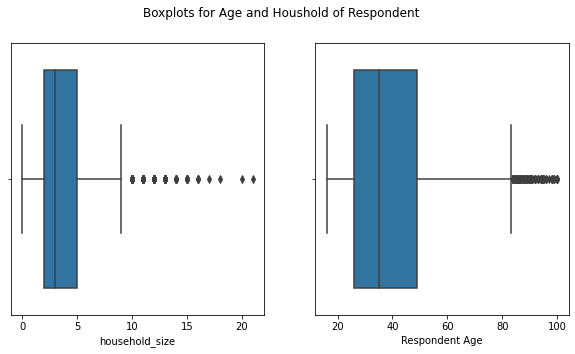

In [14]:
# plotting boxplot to check for outliers


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Boxplots for Age and Houshold of Respondent')
sns.boxplot(FinancialData_Df['household_size'], ax=ax1)
sns.boxplot(FinancialData_Df['Respondent Age'], ax=ax2)
plt.show()

In [15]:
# Function for removing Outliers and Anomalies
def Remove_Outlier(Df,col_name):
    q1 = Df[col_name].quantile(0.25)
    q3 = Df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower_bound  = q1-(1.5*iqr)
    upper_bound = q3+(1.5*iqr)
    df_out = Df.loc[(Df[col_name] > lower_bound) & (Df[col_name] < upper_bound)]
    return df_out

In [16]:
# Removing Outliers and Anomalies
FinancialData_Df1 = Remove_Outlier(FinancialData_Df,'household_size')
FinancialData_Df2 = Remove_Outlier(FinancialData_Df1,'Respondent Age')

In [17]:
# Viewing the new dataset
FinancialData_Df2


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,uniqueid_2102,No,Rural,No,2.0,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


In [18]:
# Checking for missing values
#
FinancialData_Df2.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        33
Type of Location          15
Cell Phone Access         11
household_size             0
Respondent Age             0
gender_of_respondent      26
The relathip with head     0
marital_status            26
Level of Educuation       25
Type of Job               26
dtype: int64

In [19]:
# Dropping rows with null values in all entries
FinancialData_Df2.dropna(how='all')
#
#seems like there are none

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,uniqueid_2102,No,Rural,No,2.0,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


In [20]:
# filling the null values with backward and foward fill

FinancialData_Df2 = FinancialData_Df2.fillna(method='ffill').fillna(method='bfill')

In [21]:
# ReChecking for null values 
FinancialData_Df2.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [22]:
# Dropping duplicates
FinancialData_Df2 = FinancialData_Df2.drop_duplicates()
FinancialData_Df2.shape
#seems like there are no duplicates

(22849, 13)

## 6. Exploratory Analysis

### a) Univariate Analysis

In [23]:
# checking our data once more
FinancialData_Df2.head()


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [24]:
# Checking the mean household number as well as the mode,
# the mean age and gender of the respondants
#

Modal_House_size = FinancialData_Df2['household_size'].mode()
Age_Breakdown= FinancialData_Df2['gender_of_respondent'].value_counts()
Mean_Age = FinancialData_Df2['Respondent Age'].mean()


print("The common house hold number is: " +str(Modal_House_size))
print(" \n")
print("The mean age of the respondents was "+str(Mean_Age)+ " years.")
print(" \n")
print("The breakdown of male and female respondents is as follows: ")
print(Age_Breakdown)  

The common house hold number is: 0    2.0
dtype: float64
 

The mean age of the respondents was 38.3498621383868 years.
 

The breakdown of male and female respondents is as follows: 
Female    13470
Male       9379
Name: gender_of_respondent, dtype: int64


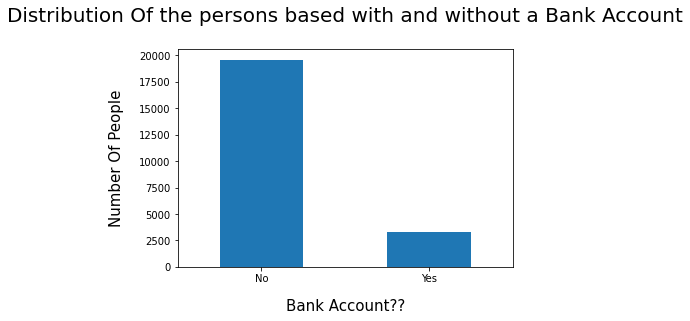

In [25]:
# Plotting a bar plot to see generally the distribution of people with and without a bank account
FinancialData_Df2['Has a Bank account'].value_counts().plot.bar()
plt.xlabel('Bank Account??',fontsize=15,labelpad=15)
plt.ylabel('Number Of People',fontsize=15,labelpad=15)
plt.xticks(rotation = 360)
plt.title('Distribution Of the persons based with and without a Bank Account', fontsize=20, y=1.1)
plt.show()

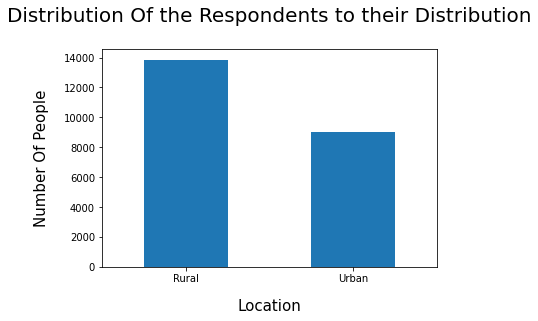

In [26]:
# Bar plot showing the general location of the respondents in the sample 
FinancialData_Df2['Type of Location'].value_counts().plot.bar()
plt.xlabel('Location',fontsize=15,labelpad=15)
plt.ylabel('Number Of People',fontsize=15,labelpad=15)
plt.xticks(rotation = 0)
plt.title('Distribution Of the Respondents to their Distribution', fontsize=20, y=1.1)
plt.show()

Generally, we can say that a lot of the people from this sample do not have bank accounts and generally more people are in the rural areas.

### b) Bivariate Analysis

In [ ]:
FinancialData_Df2()

In [27]:
# # Comparing the Level Of Education and the Bank Accc  
# x=[round for round in rounds]
# plt.bar(x, chinaPoints, width=0.5, label='China', color='Red', bottom=malaysiaPoints)
# plt.bar(x, malaysiaPoints, width=0.5, label='Malaysia',color='green')
# plt.xlabel('Rounds',fontsize=18)
# plt.ylabel('Points',fontsize=18)
# plt.title('Points scored in Mens Badminton in Rio 2016', fontsize=18)
# plt.legend(loc='upper left')
# plt.show()

In [33]:
def bivariate_viz(data,variable_1,variable_2,palette):
  bi_data = data.groupby([variable_1,variable_2])[variable_2].count()
  output = pd.DataFrame(bi_data)
  df = output.rename(columns={f"{variable_2}":'Count'}).reset_index()
  sns.set_style("whitegrid")
  ax,bar = plt.subplots(figsize = (12,10))
  ax=sns.barplot(x=f"{variable_1}",y='Count',hue=f"{variable_2}", data=df,palette=palette)

  plt.show()
  return df

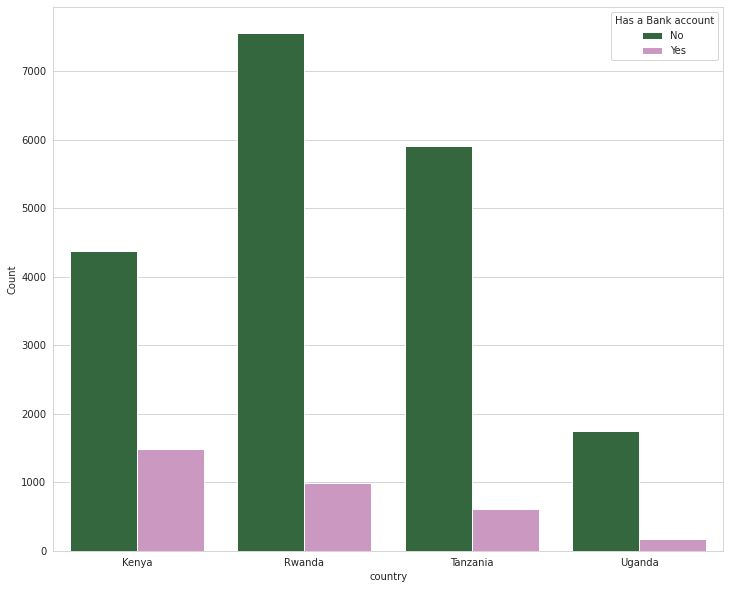

,country,Has a Bank account,Count
0,Kenya,No,4377
1,Kenya,Yes,1491
2,Rwanda,No,7558
3,Rwanda,Yes,983
4,Tanzania,No,5905
5,Tanzania,Yes,614
6,Uganda,No,1755
7,Uganda,Yes,166


In [34]:
bivariate_viz(FinancialData_Df2,'country','Has a Bank account','cubehelix')

### C) Data Reduction 

## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
# 

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?